output = activation_function( w1*x1 + w2*x2 + ... + wn*xn + bias )

In [ ]:
#!pip install numpy pandas seaborn matplotlib

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
xs = np.linspace(-5, 5, 500)

activations = {
    "sigmoid": tf.nn.sigmoid(xs),
    "tanh": tf.nn.tanh(xs),
    "relu": tf.nn.relu(xs),
    "leaky_relu": tf.nn.leaky_relu(xs),
    "elu": tf.nn.elu(xs),
    "gelu": tf.nn.gelu(xs)
}

plt.figure(figsize=(10,6))
for name, act in activations.items():
    plt.plot(xs, act, label=name)

plt.grid(True)
plt.legend()
plt.title("Activation Functions")
plt.show()


In [ ]:
import sys
sys.executable

In [ ]:
pip show tensorflow

In [ ]:
#!pip install tensorflow

In [ ]:
#!pip install torch torchvision torchaudio

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib
print("TF:", tf.__version__)
print("NumPy:", np.__version__)
print("Matplotlib:", matplotlib.__version__)

Gradient Descent (The Heart of Training)

Loss tells how wrong the model is.
Gradient Descent tells how to fix it.

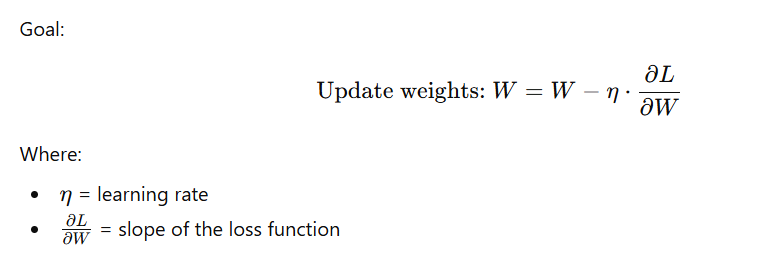




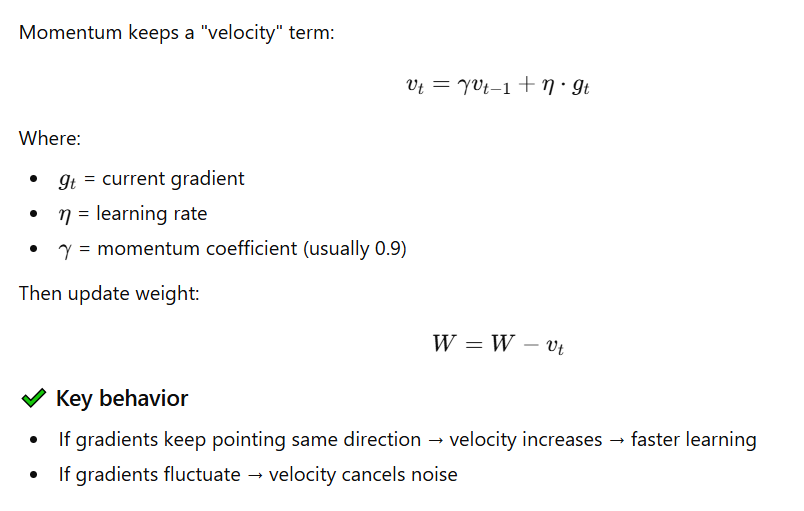

Adaptive Learning (Adagrad / RMSProp family)
🔥 Intuition

Different weights learn at different speeds.
Why should all weights have the same learning rate?

Example:

Some weights get strong gradients

Some barely change

Some need small LR, some need big LR

Adaptive optimizers fix this by giving each weight its own learning rate.


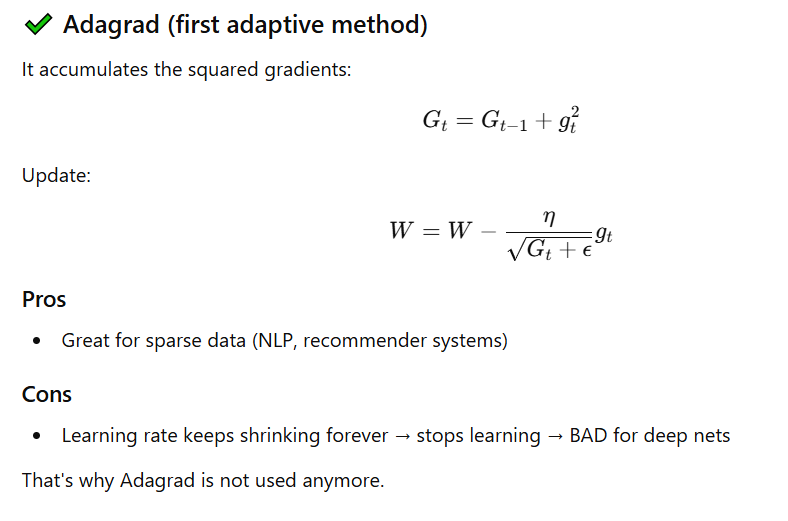

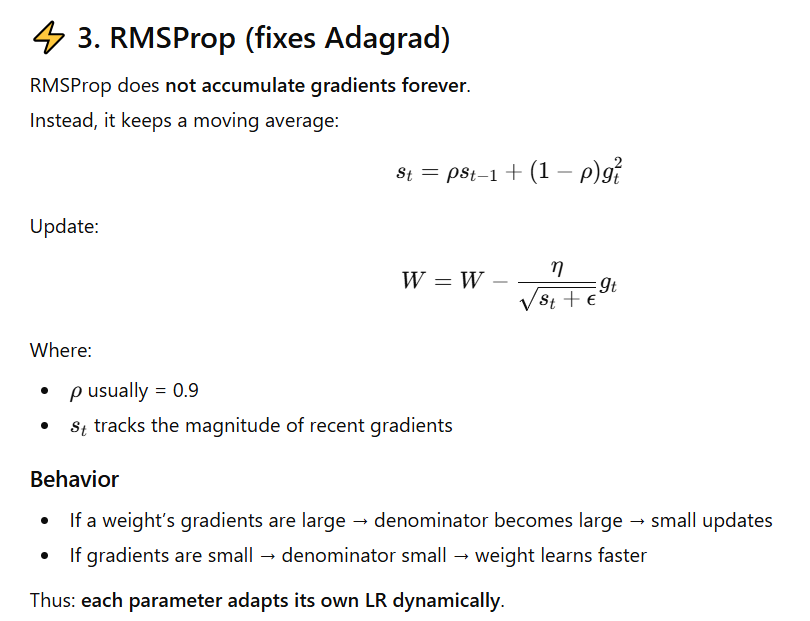

🎯 When to use RMSProp

RNNs / LSTMs

Noisy gradients

Bigger and deeper models

More stable than Adagrad

Often better than plain Adam for recurrent models

Adam (Momentum + RMSProp combined)

Adam = Momentum (first moment) + RMSProp (second moment)

This is why it works so well for nearly all models.

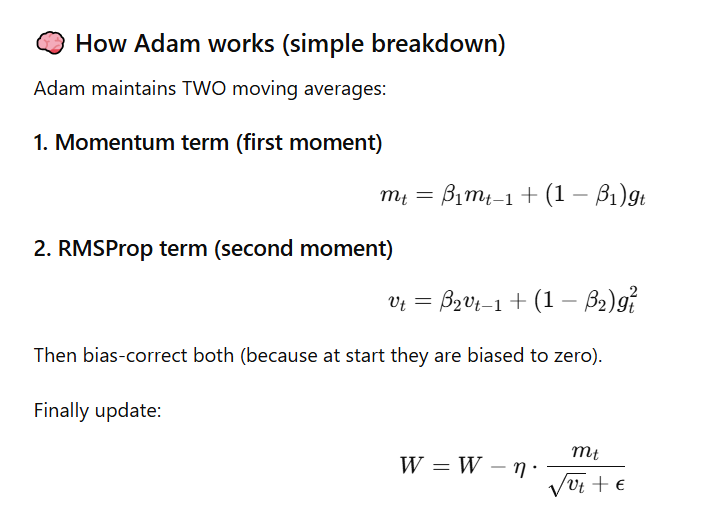

🔥 Intuition

Momentum smooths the direction

Adaptive LR scales each weight differently

Adam gets:

Fast convergence

Stable training

Low sensitivity to learning rate

Works well on almost any deep learning problem

This is why Adam is the most widely used optimizer in the world for general DL.

In [ ]:
x = torch.tensor(2.0, requires_grad=True)
y = x**2 + 3*x + 1  # build computational graph dynamically
y.backward()         # compute dy/dx

print(x.grad)        # prints derivative: 2x + 3 = 7

In [ ]:
x = x.to("cuda")

x → square → add → add → y

In [ ]:
#!pip install torchviz graphviz

In [ ]:
import torch
from torchviz import make_dot

In [ ]:
x = torch.randn(1, requires_grad=True)
y = x**3 + 2*x + 1

dot = make_dot(y, params={"x": x})
dot.render("autograd_graph", format="png")

Define a Model

In [ ]:
import torch.nn as nn

class SimpleMLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(13, 64)  # Boston Housing input = 13
        self.act1 = nn.ReLU()
        self.layer2 = nn.Linear(64, 64)
        self.act2 = nn.ReLU()
        self.out = nn.Linear(64, 1)      # Regression output
        
    def forward(self, x):
        x = self.act1(self.layer1(x))
        x = self.act2(self.layer2(x))
        return self.out(x)

model = SimpleMLP()
print(model)

Loss + Optimizer

In [ ]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

Training Loop (the part Keras hides)

In [ ]:
def train(model, X_train, y_train, X_val, y_val, epochs=100):
    train_losses = []
    val_losses = []
    
    for epoch in range(epochs):
        model.train()
        
        # forward
        preds = model(X_train)
        loss = criterion(preds, y_train)

        # backward
        optimizer.zero_grad()
        loss.backward()

        # update parameters
        optimizer.step()
        
        train_losses.append(loss.item())

        # validation
        model.eval()
        with torch.no_grad():
            val_pred = model(X_val)
            val_loss = criterion(val_pred, y_val)
            val_losses.append(val_loss.item())
        
        if epoch % 10 == 0:
            print(f"Epoch {epoch}, train loss: {loss.item():.4f}, val loss: {val_loss.item():.4f}")

    return train_losses, val_losses


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch

data = pd.read_csv('E://data/Boston.csv')
X = data.iloc[:,1:14].values
y = data['medv'].values.reshape(-1, 1)

# scale
scaler = StandardScaler()
X = scaler.fit_transform(X)

# split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

# convert to tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_val = torch.tensor(X_val, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
y_val = torch.tensor(y_val, dtype=torch.float32)

In [ ]:
#!pip install scikit-learn

In [ ]:
train_losses, val_losses = train(model, X_train, y_train, X_val, y_val, epochs=150)

In [ ]:
import matplotlib.pyplot as plt

plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Validation Loss")
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()


Visualizing Weights Updating

In [ ]:
for name, param in model.named_parameters():
    print(name, param.data[:5])  # first 5 weights


Visualizing Computational Graph of the MLP

In [ ]:
sample = X_train[0].unsqueeze(0)
y_sample = model(sample)

dot = make_dot(y_sample, params=dict(model.named_parameters()))
dot.render("mlp_graph", format="png")


In [ ]:
model.eval()

# pick the 5th record for example
sample = X_test[5].unsqueeze(0)   # convert to shape (1, 13)

with torch.no_grad():
    prediction = model(sample)

print("Predicted price:", prediction.item())
print("Actual price:", y_test[5].item())

In [ ]:
model.eval()

with torch.no_grad():
    preds = model(X_test)      # shape: (num_samples, 1)

preds = preds.numpy()          # convert to numpy for easier handling
print(preds[:5])               # show first 5 predictions


In [ ]:
import pandas as pd

df_compare = pd.DataFrame({
    "Predicted": preds.flatten(),
    "Actual": y_test.numpy().flatten()
})

print(df_compare.head(10))

In [ ]:
plt.scatter(y_test.numpy(), preds, alpha=0.7)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Boston Housing: Predicted vs Actual")
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("E://data/churn.csv")

x = df.iloc[:, 2:12]
y = df['Exited']

x = pd.get_dummies(x, columns=['Geography', 'Gender'], drop_first=True)
x = x.values
y = y.values


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=2)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)

y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
y_test = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)


In [ ]:
class ANN(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.layer1 = nn.Linear(input_dim, 6)
        self.relu1 = nn.ReLU()
        self.layer2 = nn.Linear(6, 6)
        self.relu2 = nn.ReLU()
        self.out = nn.Linear(6, 1)
        self.sigmoid = nn.Sigmoid()   # output activation

    def forward(self, x):
        x = self.relu1(self.layer1(x))
        x = self.relu2(self.layer2(x))
        x = self.sigmoid(self.out(x))
        return x

model = ANN(input_dim=X_train.shape[1])
print(model)

In [ ]:
criterion = nn.BCELoss()  # Binary cross entropy
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [ ]:
train_losses = []
val_losses = []

epochs = 500
batch_size = 32

for epoch in range(epochs):

    model.train()

    # Mini-batch gradient descent
    permutation = torch.randperm(X_train.size()[0])
    
    for i in range(0, X_train.size()[0], batch_size):
        optimizer.zero_grad()
        
        indices = permutation[i:i+batch_size]
        batch_x = X_train[indices]
        batch_y = y_train[indices]
        
        outputs = model(batch_x)
        loss = criterion(outputs, batch_y)
        
        # BACKPROP
        loss.backward()
        optimizer.step()
    
    # Store training loss
    train_losses.append(loss.item())

    # Validation loss
    model.eval()
    with torch.no_grad():
        val_out = model(X_test)
        val_loss = criterion(val_out, y_test)
        val_losses.append(val_loss.item())

    if epoch % 50 == 0:
        print(f"Epoch {epoch} | Train Loss: {loss.item():.4f} | Val Loss: {val_loss.item():.4f}")


In [ ]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.legend()
plt.title("Loss over Epochs")

plt.subplot(1,2,2)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.legend()
plt.title("Training vs Validation")

plt.show()


In [ ]:
y_pred = model(X_test).detach().numpy()
y_pred = (y_pred > 0.5).astype(int)

pd.crosstab(y_test.numpy().flatten(), y_pred.flatten())


In [ ]:
weights = model.layer1.weight.detach().numpy()

plt.figure(figsize=(10,6))
plt.imshow(weights, aspect='auto', cmap='viridis')
plt.colorbar()
plt.title('Weights of First Hidden Layer')
plt.xlabel("Neurons")
plt.ylabel("Input Features")
plt.show()


In [ ]:
#drop out
import torch.nn as nn

class ANN(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.layer1 = nn.Linear(input_dim, 6)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(0.5)   # <-- Dropout 50%

        self.layer2 = nn.Linear(6, 6)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(0.5)

        self.out = nn.Linear(6, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu1(self.layer1(x))
        x = self.dropout1(x)

        x = self.relu2(self.layer2(x))
        x = self.dropout2(x)

        x = self.sigmoid(self.out(x))
        return x
